<a href="https://colab.research.google.com/github/daniiltroilov/eda_online_store/blob/main/vk_video_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Импортируем библиотеки и загружаем датафрейм

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
! gdown --id 1Uj0MeU0rLJ7FKt9vg0VEINk1duWaulP7
df = pd.read_csv('/content/video_sessions_transformed.csv')

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Uj0MeU0rLJ7FKt9vg0VEINk1duWaulP7
To: /content/video_sessions_transformed.csv
100% 333k/333k [00:00<00:00, 11.6MB/s]


Чтобы видеть все стобцы меняем максимальное значениe. Также устанавлием количество цифр после запятой: 2


In [ ]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', '{:.2f}'.format)

# Смотрим на датафрейм и проводим обработку данных


In [ ]:
df.head()

,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id
0,5137060586,197846393764,0,vk_video_ios,video_for_you,1524753638856
1,6791352918,255312742952,0,vk_video_android,video_search,1524750811524
2,8499858010,290290140528,2,vk_video_android,video_for_you,1524751697154
3,13064371614,296968444192,0,vk_video_android,video_search,1524751112304
4,15865765790,283074246524,0,vk_video_android,video_for_you,1524752278662


In [ ]:
df.shape

(4503, 6)

In [ ]:
df.describe(include='all')

,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id
count,4503.00,4503.00,4503.00,4503,4503,4503.00
unique,NaN,NaN,NaN,3,10,NaN
top,NaN,NaN,NaN,vk_video_android,video_for_you,NaN
freq,NaN,NaN,NaN,3296,2213,NaN
mean,12335439677763.86,181159332950.28,104659.89,NaN,NaN,1508004913273.82
std,10768789828243.47,201580297878.99,4959591.64,NaN,NaN,128912974406.16
min,208518338.00,-1122276752848.00,-300.00,NaN,NaN,2344280.00
25%,2248819224981.00,137716120828.00,0.00,NaN,NaN,1524751804098.00
50%,9657196427816.00,254289612684.00,0.00,NaN,NaN,1524754283862.00
75%,20482626682889.00,283977180100.00,2.00,NaN,NaN,1524762206073.00


Посмотрел на типы данных: с датами мы не работаем и типы данных менять не надо.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          4503 non-null   int64 
 1   video_owner_id   4503 non-null   int64 
 2   total_view_time  4503 non-null   int64 
 3   vk_platform      4503 non-null   object
 4   nav_screen       4503 non-null   object
 5   video_id         4503 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 211.2+ KB


Обработка NaN значений

In [ ]:
df.isna().value_counts()

,,,,,,count
user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id,
False,False,False,False,False,False,4503


In [ ]:
df.isnull().sum()

,0
user_id,0
video_owner_id,0
total_view_time,0
vk_platform,0
nav_screen,0
video_id,0


In [ ]:
df.dropna()

,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id
0,5137060586,197846393764,0,vk_video_ios,video_for_you,1524753638856
1,6791352918,255312742952,0,vk_video_android,video_search,1524750811524
2,8499858010,290290140528,2,vk_video_android,video_for_you,1524751697154
3,13064371614,296968444192,0,vk_video_android,video_search,1524751112304
4,15865765790,283074246524,0,vk_video_android,video_for_you,1524752278662
...,...,...,...,...,...,...
4498,9708423871832,140392851628,0,vk_video_android,video_search,1524752950404
4499,9774567153610,289517640812,1,vk_video_ios,video_for_you,1524755550480
4500,30204042042,-22323244242,-300,vk_video_ios,video_for_you,2344280
4501,242424222,232300404,230100333,vk_video_android,feed,152473232


Смотрю есть ли дубликаты

In [ ]:
df.drop_duplicates()

,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id
0,5137060586,197846393764,0,vk_video_ios,video_for_you,1524753638856
1,6791352918,255312742952,0,vk_video_android,video_search,1524750811524
2,8499858010,290290140528,2,vk_video_android,video_for_you,1524751697154
3,13064371614,296968444192,0,vk_video_android,video_search,1524751112304
4,15865765790,283074246524,0,vk_video_android,video_for_you,1524752278662
...,...,...,...,...,...,...
4498,9708423871832,140392851628,0,vk_video_android,video_search,1524752950404
4499,9774567153610,289517640812,1,vk_video_ios,video_for_you,1524755550480
4500,30204042042,-22323244242,-300,vk_video_ios,video_for_you,2344280
4501,242424222,232300404,230100333,vk_video_android,feed,152473232


In [ ]:
(df['user_id'] < 0).sum()

np.int64(0)

In [ ]:
(df['video_id'] < 0).sum()

np.int64(0)

In [ ]:
(df['video_owner_id'] < 0).sum()

np.int64(250)

Нашел отрицательное значение, там где его не должно быть

In [ ]:
df = df.drop(df[df['video_owner_id'] < 0].index)
df

,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id
0,5137060586,197846393764,0,vk_video_ios,video_for_you,1524753638856
1,6791352918,255312742952,0,vk_video_android,video_search,1524750811524
2,8499858010,290290140528,2,vk_video_android,video_for_you,1524751697154
3,13064371614,296968444192,0,vk_video_android,video_search,1524751112304
4,15865765790,283074246524,0,vk_video_android,video_for_you,1524752278662
...,...,...,...,...,...,...
4497,9707361703312,145819277544,0,vk_video_ios,video_search,1524762578706
4498,9708423871832,140392851628,0,vk_video_android,video_search,1524752950404
4499,9774567153610,289517640812,1,vk_video_ios,video_for_you,1524755550480
4501,242424222,232300404,230100333,vk_video_android,feed,152473232


In [ ]:
(df['total_view_time'] < 0).sum()

np.int64(0)

Смотрю на категориальные переменные

In [ ]:
df['vk_platform'].value_counts()

,count
vk_platform,
vk_video_android,3086
vk_video_ios,1166
other,1


В данном датафрейме удалять столбцы не буду: информация не в избытке

Нет столбца который можно было бы убрать

Разбиваю датафрейм по просмотреному времени, беру -1 заранее зная, что минусов не предпологается.

Сначала смотрю на предпоследнюю группу 'large'

In [ ]:
labels = ['small','medium','large', 'other']
df['total_view_time_bins'] = pd.cut(df['total_view_time'], bins = [-1,1000,5000,26000, float('infinity')], labels=labels)
df.where(df['total_view_time_bins'] == 'large').dropna()

,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id,total_view_time_bins
51,296346924566.00,291304532396.00,9256.00,vk_video_android,video_search,1524752816724.00,large
121,937898618132.00,145819277544.00,7971.00,vk_video_android,video_for_you,1524762124194.00,large
424,8894082860138.00,296176204960.00,5840.00,vk_video_ios,video_for_you,1524751179144.00,large
499,11914333948258.00,224122714900.00,5754.00,vk_video_android,video_search,1524763126794.00,large
570,14416155239290.00,140097381168.00,8944.00,vk_video_ios,video_search,1524764714244.00,large
867,28043672740342.00,270249683300.00,12811.00,vk_video_android,video_my_history,1524755520402.00,large
1046,269225786648.00,279672446984.00,6568.00,vk_video_android,video_search,1524754758426.00,large
1316,5289199761874.00,135952837488.00,6028.00,vk_video_android,video_for_you,1524784097844.00,large
1322,5484664370024.00,279672446984.00,6330.00,vk_video_ios,video_search,1524754758426.00,large
1453,10756334335558.00,279672446984.00,6631.00,vk_video_android,video_search,1524754758426.00,large


In [ ]:
df['nav_screen'].value_counts()

,count
nav_screen,
video_for_you,2192
video_search,1851
video_group_all,93
video_my_history,90
video_my_added,7
catalog_other,7
video_my_bookmarks,6
video_playlist,4
video_group_main,2


А теперь на предпологаемые выбросы

{'whiskers': [<matplotlib.lines.Line2D at 0x7f38d713f310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f38d7128750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f38d713ea10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f38d7129b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f38d712a310>],
 'means': []}

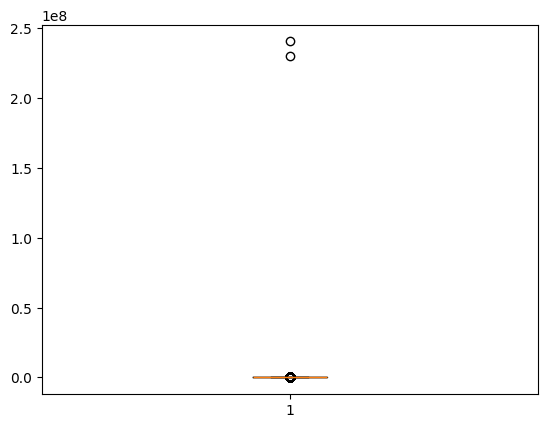

In [ ]:
plt.boxplot(df['total_view_time'])

Удаляю выбросы, смотрю по бокс-плот, что осталось.
Делаю выводы, что 25 000 это не выброс

{'whiskers': [<matplotlib.lines.Line2D at 0x7f38d71738d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f38d70b10d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f38d7172d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f38d70b2910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f38d70b3450>],
 'means': []}

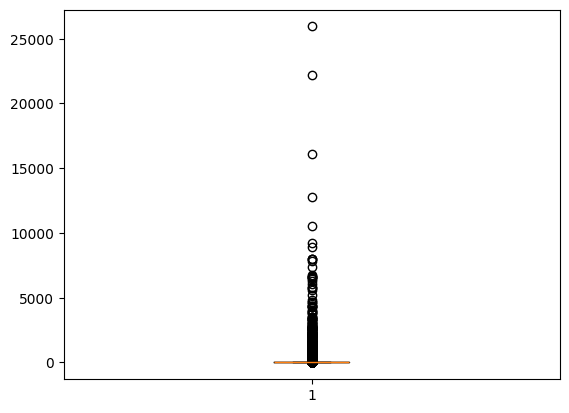

In [ ]:
df = df[df['total_view_time_bins'] != 'other']
plt.boxplot(df['total_view_time'])

# Платформа ВК видео на андроид занимает первую строчку по осознаным просмотрам (255), значительно выше просмотров на ios (116)

In [ ]:
df.loc[df['total_view_time'] > 30].value_counts(df['vk_platform'])

,count
vk_platform,
vk_video_android,255
vk_video_ios,116


Мне интересно взглянуть по минутам

In [ ]:
((df['total_view_time'].loc[df['total_view_time'] > 30]).apply(lambda row: row/60)).tail()

,total_view_time
4401,62.52
4405,1.08
4413,72.98
4424,51.40
4439,6.03


# Топ 10 сообществ по времени просмотра

In [ ]:
(df.loc[df['total_view_time'] > 30]).value_counts(df['video_owner_id']).sort_values(ascending=False).head(10)

,count
video_owner_id,
279672446984,43
279942606536,19
145819277544,15
292278366172,15
140097381168,11
278008965440,10
292769954132,10
283074246524,10
218753722780,6


# Смотрим самые популярные экраны просмотра

In [ ]:
df.groupby(['nav_screen'])['total_view_time'].sum().sort_values(ascending=False)

,total_view_time
nav_screen,
video_search,238899
video_for_you,217530
video_my_history,141228
video_group_all,29443
video_my_bookmarks,6098
video_playlist,5091
video_my_added,3374
video_group_main,633
catalog_other,242


In [ ]:
df

,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id,total_view_time_bins
0,5137060586,197846393764,0,vk_video_ios,video_for_you,1524753638856,small
1,6791352918,255312742952,0,vk_video_android,video_search,1524750811524,small
2,8499858010,290290140528,2,vk_video_android,video_for_you,1524751697154,small
3,13064371614,296968444192,0,vk_video_android,video_search,1524751112304,small
4,15865765790,283074246524,0,vk_video_android,video_for_you,1524752278662,small
...,...,...,...,...,...,...,...
4495,9624212079510,214109178444,7,vk_video_android,video_for_you,1524753381522,small
4496,9658052286666,291972310332,0,vk_video_android,video_search,1524751426452,small
4497,9707361703312,145819277544,0,vk_video_ios,video_search,1524762578706,small
4498,9708423871832,140392851628,0,vk_video_android,video_search,1524752950404,small
